In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import cv2

In [145]:
img = cv2.imread('assets/color_card.jpg')
img2 = cv2.imread('assets/color_card2.PNG')
img3 = cv2.imread('assets/color_card3.jpeg')
img4 = cv2.imread('assets/color_card4.jpeg')
# plt.imshow(img)
cv2.imshow("Original", img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [5]:
# cv2.imshow("Original", img4)
# cv2.waitKey(0)

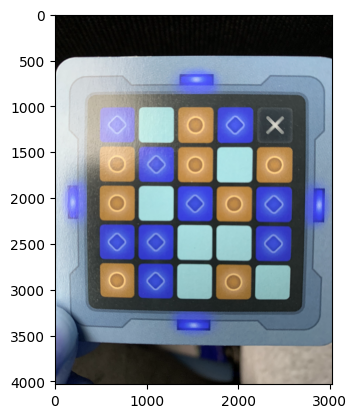

In [6]:
plt.imshow(img3)

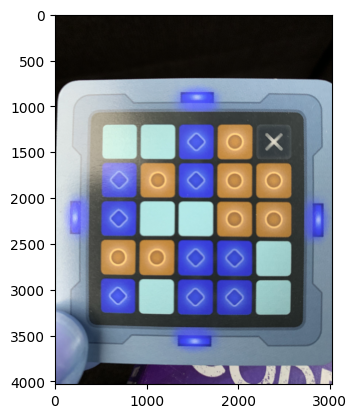

In [7]:
plt.imshow(img4)

In [166]:
# this block is used to try and remove brightness/lighting problems
def preprocess_img(img):
  # Convert the image to LAB color space
  lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

  # Split the LAB image into its 3 channels
  l, a, b = cv2.split(lab)

  # Apply CLAHE to the L channel
  clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
  cl = clahe.apply(l)

  # increase brightnes of iamge
  limg = cv2.merge((cl,a,b))

  # Convert the image back to BGR color space
  processed_img = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

  return processed_img 

# Show the result
processed_img = preprocess_img(img[300:1400, 275:1400])
processed_img2 = preprocess_img(img2[250:1750, 250:1750])
processed_img3 = preprocess_img(img3[1000:3250, 300:2700])
processed_img4 = preprocess_img(img4[250:1750, 250:1750])

# plt.imshow(processed_img)
cv2.imshow('processed', processed_img)
cv2.waitKey(0)
print(processed_img[100, 550])


[41 32 26]


: 

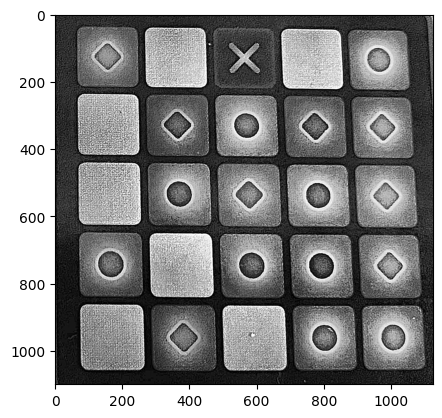

In [165]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])

# Apply the kernel to the image using filter2D function
gray_orig = cv2.cvtColor(processed_img.copy(), cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray_orig,(5,5),0)
blur = cv2.filter2D(blur, -1, kernel)
plt.imshow(blur, cmap='gray', vmin=0, vmax=255)
# plt.imshow(processed_img3)


In [104]:
lower_blue = np.array([100,150,50])
upper_blue = np.array([140,255,255])

lower_red = np.array([0,50,50])
upper_red = np.array([10,255,255])

lower_beige = np.array([20, 10, 150])
upper_beige = np.array([40, 70, 255])

# lower_gray = np.array([50])
# upper_gray = np.array([150])

lower_black = np.array([0, 0, 0])
upper_black = np.array([179, 255, 30])




In [141]:
# convert images to HSV standard
cropped_img = img[300:1400, 275:1400]
red_img = cv2.cvtColor(processed_img.copy(), cv2.COLOR_BGR2HSV)
blue_img = cv2.cvtColor(processed_img.copy(), cv2.COLOR_BGR2HSV)
beige_img = cv2.cvtColor(processed_img.copy(), cv2.COLOR_BGR2HSV)
gray_img = cv2.cvtColor(processed_img.copy(),  cv2.COLOR_BGR2HSV)

# find each individual color
red_mask = cv2.inRange(red_img, lower_red, upper_red)
blue_mask = cv2.inRange(blue_img, lower_blue, upper_blue)
beige_mask = cv2.inRange(beige_img, lower_beige, upper_beige)
gray_mask = cv2.inRange(gray_img, lower_black, upper_black)


In [155]:

gray_orig = cv2.cvtColor(img[300:1400, 275:1400].copy(), cv2.COLOR_BGR2GRAY)
gray_img2 = cv2.cvtColor(processed_img2.copy(), cv2.COLOR_BGR2GRAY)
gray_img3 =  cv2.cvtColor(img3[1000:3250, 300:2700].copy(), cv2.COLOR_BGR2GRAY)
cropped_img =  cv2.cvtColor(img2[250:1750, 250:1750], cv2.COLOR_BGR2GRAY)

[(20, 67, 39), (6, 268, 40), (8, 673, 44), (11, 876, 49), (24, 517, 86), (4, 67, 237), (7, 477, 241), (13, 888, 248), (21, 698, 257), (23, 312, 263), (3, 70, 441), (15, 292, 444), (10, 484, 446), (5, 691, 448), (9, 894, 450), (19, 72, 649), (2, 281, 651), (17, 496, 654), (14, 700, 656), (16, 905, 657), (0, 75, 863), (1, 498, 866), (12, 915, 867), (18, 725, 874), (22, 318, 883)]


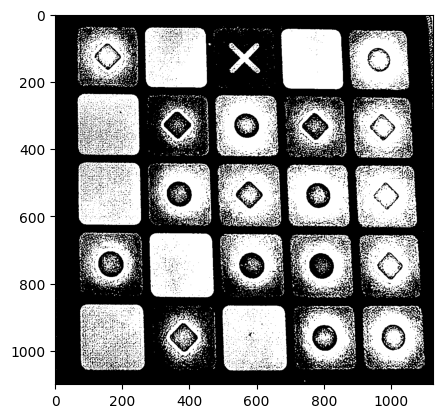

In [161]:

# plt.imshow(gray_orig, cmap="gray", vmin=0, vmax=255)
img_h,img_w = gray_orig.shape
background_thresh = gray_orig[0][0]
ADD_THRESH = 90
# blur = cv2.GaussianBlur(gray_orig,(5,5),0)
# + ADD_THRESH
total_thresh = background_thresh 
_,thresh_img = cv2.threshold(blur,total_thresh,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(thresh_img, cmap="gray", vmin=0, vmax=255)

contours, hier = cv2.findContours(thresh_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


# and cv2.contourArea(x) > (img_h * img_w)/385
#cv2.contourArea(x) < (img_h * img_w)/25 
# top_25_contours = sorted(contours, key=lambda x : cv2.contourArea(x) if cv2.contourArea(x) < (img_h * img_w)/25 else 0,reverse=True)[:25]
contours = [contour for contour,h in zip(contours,hier[0]) if h[3] == -1 and h[2] > -1]
top_25_contours = sorted(contours, key=lambda x : cv2.contourArea(x) if cv2.contourArea(x) < (img_h * img_w)/25 else 0,reverse=True)[:25]


# sort x and y later
coords_and_index = []
for i,contour in enumerate(top_25_contours):
    x, y, _, _ = cv2.boundingRect(contour)
    coords_and_index.append((i,x,y))
# print(coords_and_index)
# sort by y
sorted_y = sorted(coords_and_index,key=lambda x:x[2])
print(sorted_y)
# sort by x
for i in range(5):
    sorted_y[5 * i:5* (i + 1)] = sorted(sorted_y[5 * i:5* (i + 1)], key=lambda x:x[1])
top_25_sorted = [top_25_contours[i[0]] for i in sorted_y]
# print(top_25_sorted)

0 67 39
1 268 40
2 517 86
3 673 44
4 876 49
5 67 237
6 312 263
7 477 241
8 698 257
9 888 248
10 70 441
11 292 444
12 484 446
13 691 448
14 894 450
15 72 649
16 281 651
17 496 654
18 700 656
19 905 657
20 75 863
21 318 883
22 498 866
23 725 874
24 915 867


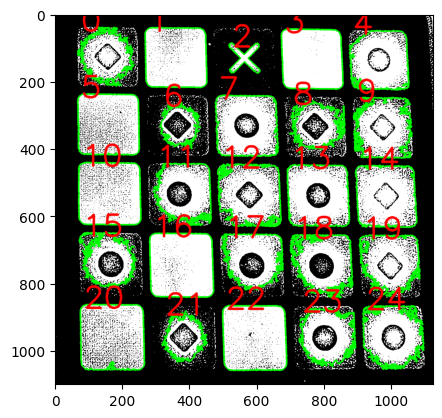

In [162]:
print_img = cv2.cvtColor(thresh_img, cv2.COLOR_BGR2RGB)
cv2.drawContours(print_img, top_25_contours, -1, (0, 255, 0), 3)

font = cv2.FONT_HERSHEY_SIMPLEX

fontScale = 3
color = (255, 0, 0)
thickness = 5
for i, place in enumerate(sorted_y):  
    print(i, place[1], place[2])
    cv2.putText(print_img, str(i), (place[1] + 10,place[2] + 10), font, 
                   fontScale, color, thickness, cv2.LINE_AA)

# imS = cv2.resize(print_img, (960, 540)) 
plt.imshow(print_img)

In [138]:
# this stores the color of each respective square
colors = []
hsv_cropped_img = cv2.cvtColor(img[300:1400, 275:1400].copy(), cv2.COLOR_BGR2HSV)

lower_blue = np.array([60,100,50])
upper_blue = np.array([140,255,255])

lower_red = np.array([0,50,50])
upper_red = np.array([60,255,255])

lower_beige = np.array([0, 10, 120])
upper_beige = np.array([40, 80, 255])

lower_black = np.array([0, 0, 0])
upper_black = np.array([179, 255, 30])

for i, place in enumerate(sorted_y):
    color = np.mean(hsv_cropped_img[place[2]:place[2]+150, place[1]:place[1]+150], axis=(0, 1))
    print(i, color)
    if all(color <= upper_beige) and all(color >= lower_beige):
        colors.append((i, "beige"))
    elif all(color <= upper_black) and all(color >= lower_black):
        colors.append((i, "black"))
    elif all(color <= upper_blue) and all(color >= lower_blue):
        colors.append((i, "blue"))
    elif all(color <= upper_red) and all(color >= lower_red):
        colors.append((i, "red"))
    else:
        colors.append((i, "black"))

print(colors)
if len(colors) == 25:
    print('Found All Squares')
else:
    print("May not have found all squares")
# print(len(colors))

0 [ 32.48155556 116.406      136.95351111]
1 [ 10.49595556  27.08222222 148.96235556]
2 [64.15911111 66.03186667 88.63844444]
3 [ 15.91284444  37.75746667 165.27151111]
4 [ 73.21173333 117.40884444 172.37328889]
5 [  5.28493333  18.6512     141.20786667]
6 [ 28.73822222 119.66053333 148.62551111]
7 [ 66.34448889 108.80053333 165.05844444]
8 [ 32.8956     123.91728889 167.21475556]
9 [ 34.35195556 126.47204444 172.51991111]
10 [  6.23124444  19.26391111 139.91568889]
11 [ 61.98395556 102.66946667 154.55444444]
12 [ 29.80946667 115.81591111 156.17057778]
13 [ 68.95711111 110.66804444 171.2172    ]
14 [ 39.49302222 134.01786667 173.55755556]
15 [ 64.80662222 113.56284444 140.20022222]
16 [ 15.52857778  33.70364444 148.43364444]
17 [ 63.60048889 107.45613333 155.57591111]
18 [ 70.27511111 116.77973333 162.53533333]
19 [ 33.27102222 135.4632     161.36275556]
20 [ 13.59253333  27.3284     129.20595556]
21 [ 19.24355556 132.50813333 129.80466667]
22 [ 14.43613333  30.23191111 144.28928889]
2